#### Importing libraries

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


#### Load the dataset and Split features and target variable

In [31]:
!wget https://archive.ics.uci.edu/static/public/59/letter+recognition.zip
!unzip letter+recognition.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [32]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [33]:
df = pd.read_csv(r"D:\HOCTAP\TTNTNC\Letter-Recognition_Project-ML-main\Letter-Recognition_Project-ML-main\letter+recognition\letter-recognition.data", header=None)

df.columns = ['class'] + [f'f{i}' for i in range(1, 17)]

X = df.drop('class', axis=1).values
y = df['class'].values


In [34]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [35]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20000 non-null  object
 1   1       20000 non-null  int64 
 2   2       20000 non-null  int64 
 3   3       20000 non-null  int64 
 4   4       20000 non-null  int64 
 5   5       20000 non-null  int64 
 6   6       20000 non-null  int64 
 7   7       20000 non-null  int64 
 8   8       20000 non-null  int64 
 9   9       20000 non-null  int64 
 10  10      20000 non-null  int64 
 11  11      20000 non-null  int64 
 12  12      20000 non-null  int64 
 13  13      20000 non-null  int64 
 14  14      20000 non-null  int64 
 15  15      20000 non-null  int64 
 16  16      20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


#### Naive Bayes Gaussian

In [37]:
#Naive Bayes Gaussian
class NaiveBayesGaussian:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.prior = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0) + 1e-6  # tránh chia 0
            self.prior[c] = X_c.shape[0] / X.shape[0]

    def gaussian_pdf(self, c, x):
        mean = self.mean[c]
        var = self.var[c]
        numerator = np.exp(-(x - mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict_single(self, x):
        posteriors = []

        for c in self.classes:
            prior = np.log(self.prior[c])
            conditional = np.sum(np.log(self.gaussian_pdf(c, x)))
            posteriors.append(prior + conditional)

        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return np.array([self.predict_single(sample) for sample in X])


#### Chia tập Train/Test, Huấn luyện Naive Bayes, Dự đoán, Đánh giá mô hình

Accuracy: 0.648


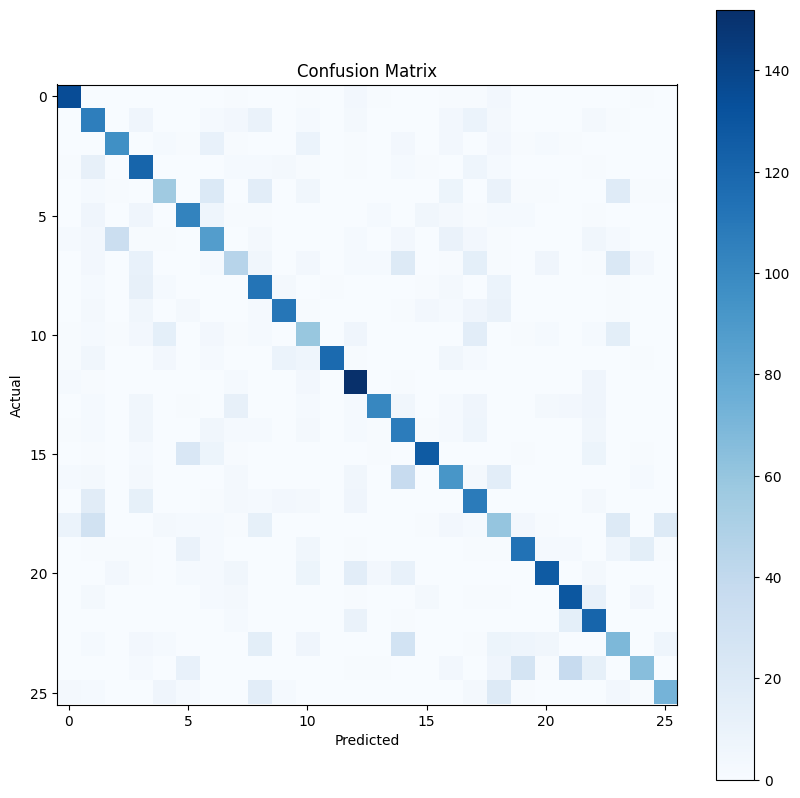

In [38]:
#Chia tập Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Huấn luyện Naive Bayes
model = NaiveBayesGaussian()
model.fit(X_train, y_train)

#Dự đoán
y_pred = model.predict(X_test)

#Đánh giá mô hình
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()
